In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import heapq
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
import os
os.chdir('D:\Python Directory\Jupyter')

In [3]:
ikea_ds = pd.read_csv("ikea_ds.csv")
ikea_ds.head(10)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
5,117,2010,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0
6,120,2010,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0
8,125,2010,Ekerö,144,116,25410,3893,0.153207,62.21259,14.837580,0,0
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0


In [96]:
ikea_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kommun_code            207 non-null    int64  
 1   Year                   207 non-null    int64  
 2   Kommun_name            207 non-null    object 
 3   Revenue                207 non-null    int64  
 4   Employee               207 non-null    int64  
 5   Population             207 non-null    int64  
 6   Population_University  207 non-null    int64  
 7   Percent_University     207 non-null    float64
 8   Productivity           207 non-null    float64
 9   SalesIndex             207 non-null    float64
 10  Infrast                207 non-null    int64  
 11  Border                 207 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 19.5+ KB


In [4]:
mv = ikea_ds.isnull().sum()
mv

Kommun_code              0
Year                     0
Kommun_name              0
Revenue                  0
Employee                 0
Population               0
Population_University    0
Percent_University       0
Productivity             0
SalesIndex               0
Infrast                  0
Border                   0
dtype: int64

In [4]:
useful_data = ikea_ds.drop(columns=['Kommun_code','Year','Kommun_name', 'Border', 'Infrast'])
useful_data.head()

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex
0,1078,276,10059,719,0.071478,195.74174,111.075774
1,3790,1621,62815,8716,0.138757,117.17365,390.516869
2,4560,1910,85753,13308,0.155190,119.64794,469.856708
3,1366,708,39289,4419,0.112474,96.69215,140.750935
4,171,99,30114,3843,0.127615,86.56347,17.619627


In [5]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(useful_data)

In [7]:
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [8]:
wcss = []

for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(reduced)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [9]:
kmeans.inertia_

0.8212433183977419

In [10]:
wcss

[15.69932271336257,
 10.14875245001447,
 5.963515326174494,
 4.638086326900828,
 3.765924463688919,
 3.1198116255606245,
 2.611594695778168,
 2.1694263682182706,
 1.8687162637961112,
 1.660002353407722,
 1.5023762019506617,
 1.3931497478004866,
 1.2663176377460976,
 1.1889893285252946,
 1.1190490204062689,
 1.0294555764849342,
 0.9716813171720993,
 0.8683391576726329,
 0.8212433183977419]

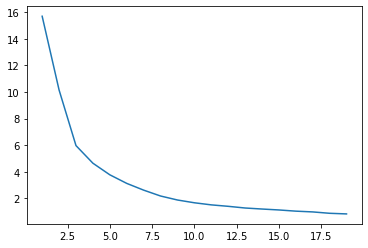

In [17]:
number_clusters = range(1,20)
plt.plot(number_clusters,wcss)
plt.savefig('elbow.png')

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(reduced)

In [13]:
km = KMeans(n_clusters = 3)
km.fit(reduced)


KMeans(n_clusters=3)

In [14]:
lables = km.labels_

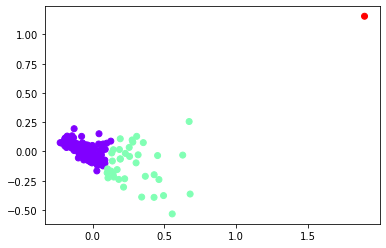

In [16]:
plt.scatter(reduced[:,0], reduced[:,1], c=lables, cmap='rainbow')
plt.savefig('clusters.png')

In [16]:
Y=predicted=km.fit_predict(X)

In [17]:
Y

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0])

In [18]:
ikea = ikea_ds.iloc[:,2:12]
ikea['cluster'] = pd.Series(Y)

In [92]:
ikea.head(10)

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
0,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,1,True
1,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1,True
2,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1,True
3,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0,False
4,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,1,False
5,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0,1,False
6,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0,0,1,False
7,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,1,False
8,Ekerö,144,116,25410,3893,0.153207,62.21259,14.837580,0,0,1,False
9,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,1,False


In [94]:
cluster1=ikea[ikea.cluster==0]
cluster2=ikea[ikea.cluster==1]
cluster3=ikea[ikea.cluster==2]

In [21]:
print(cluster1)

        Kommun_name  Revenue  Employee  Population  Population_University  \
3    Upplands Väsby     1366       708       39289                   4419   
11            Salem       27        68       15391                   1900   
12          Haninge     1459      1031       77054                   6776   
13           Tyresö      480       290       42947                   5219   
15          Nykvarn       16        20        9331                    891   
..              ...      ...       ...         ...                    ...   
201       Degerfors       56        27        9641                    483   
202       Hällefors       52        33        7220                    368   
203    Ljusnarsberg       51        24        4931                    266   
205           Kumla      152        98       20456                   1598   
206       Askersund      126        65       11278                    809   

     Percent_University  Productivity  SalesIndex  Infrast  Border  cluster

In [22]:
print(cluster2)

      Kommun_name  Revenue  Employee  Population  Population_University  \
0       Haparanda     1078       276       10059                    719   
1          Kalmar     3790      1621       62815                   8716   
2        Karlstad     4560      1910       85753                  13308   
4      Vallentuna      171        99       30114                   3843   
5       Österåker      563       314       39521                   5011   
6          Värmdö      920       454       38301                   4720   
7        Järfälla     5119      2001       66211                   9009   
8           Ekerö      144       116       25410                   3893   
9        Huddinge     7153      2374       97453                  12795   
10       Botkyrka     1469       530       82608                   8023   
14   Upplands-Bro      222        80       23676                   2520   
16           Täby     3441      1546       63789                  13442   
17       Danderyd      50

In [24]:
print(cluster3)

   Kommun_name  Revenue  Employee  Population  Population_University  \
19   Stockholm    32897     18795      847073                 191585   

    Percent_University  Productivity   SalesIndex  Infrast  Border  cluster  
19            0.226173       87.7178  3389.665819        1       0        2  


In [25]:
ikea.head()

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster
0,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,1
1,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1
2,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1
3,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0
4,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,1


In [50]:
df = ["Borlänge", "Gävle", "Göteborg", "Haparanda", "Helsingborg", "Jönköping", "Kalmar", "Karlstad", "Linköping", "Malmö", "Stockholm", "Sundsvall", "Uddevalla", "Umeå", "Uppsala", "Västerås", "Älmhult", "Örebro"]

In [65]:
ikea['has_ikea'].value_counts()

False    195
True      12
Name: has_ikea, dtype: int64

In [70]:
ikea["has_ikea"] = ikea['Kommun_name'].isin(df)

In [71]:
ikea.head()

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
0,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,1,True
1,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1,True
2,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1,True
3,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0,False
4,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,1,False


### Cluster 1 Analysis

In [95]:
cluster1.shape

(156, 12)

In [119]:
heapq.nlargest(2, cluster1['SalesIndex'])

[569.59822, 457.28598099999994]

In [121]:
cluster1.loc[cluster1['SalesIndex'] == 569.59822]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
120,Helsingborg,5528,3244,129177,16395,0.126919,85.40061,569.59822,1,0,0,True


In [122]:
cluster1.loc[cluster1['SalesIndex'] == 457.28598099999994]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
53,Norrköping,4438,2630,130050,14526,0.111695,84.56785,457.285981,0,0,0,False


In [123]:
cluster1['Population'].max()

130050

In [124]:
cluster1.loc[cluster1['Population'] == 130050]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
53,Norrköping,4438,2630,130050,14526,0.111695,84.56785,457.285981,0,0,0,False


In [129]:
heapq.nlargest(2, cluster1['Revenue'])

[5528, 4438]

In [126]:
cluster1.loc[cluster1['Revenue'] == 5528]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
120,Helsingborg,5528,3244,129177,16395,0.126919,85.40061,569.59822,1,0,0,True


In [130]:
cluster1.loc[cluster1['Revenue'] == 4438]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
53,Norrköping,4438,2630,130050,14526,0.111695,84.56785,457.285981,0,0,0,False


### Cluster 2 Analysis

In [81]:
cluster2.shape

(50, 11)

In [131]:
heapq.nlargest(2, cluster2['SalesIndex'])

[1155.7856789999998, 737.036192]

In [132]:
cluster2.loc[cluster2['SalesIndex'] == 1155.7856789999998]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
117,Malmö,11217,5740,298963,50084,0.167526,97.93515,1155.785679,1,0,1,True


In [133]:
cluster2.loc[cluster2['SalesIndex'] == 737.036192]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
9,Huddinge,7153,2374,97453,12795,0.131294,151.0015,737.036192,0,0,1,False


In [153]:
heapq.nlargest(10, cluster2['Population'])

[298963, 197787, 146416, 135460, 127382, 110488, 103294, 97453, 91800, 90108]

In [137]:
cluster2.loc[cluster2['Population'] == 298963]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
117,Malmö,11217,5740,298963,50084,0.167526,97.93515,1155.785679,1,0,1,True


In [138]:
cluster2.loc[cluster2['Population'] == 197787]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
33,Uppsala,7042,3391,197787,40476,0.204644,104.07394,725.59889,0,0,1,True


In [140]:
cluster2.loc[cluster2['Population'] == 146416]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
52,Linköping,5348,2280,146416,26023,0.177733,117.55208,551.051245,0,0,1,True


In [142]:
cluster2.loc[cluster2['Population'] == 135460]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
204,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0,1,True


In [144]:
cluster2.loc[cluster2['Population'] == 127382]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
64,Jönköping,5298,2556,127382,16750,0.131494,103.87831,545.899307,0,0,1,True


In [145]:
cluster2.loc[cluster2['Population'] == 110488]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
118,Lund,3438,1561,110488,29233,0.264581,110.37653,354.247229,0,0,1,False


In [147]:
heapq.nlargest(2, cluster2['Revenue'])

[11217, 7153]

In [148]:
cluster2.loc[cluster2['Revenue'] == 11217]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
117,Malmö,11217,5740,298963,50084,0.167526,97.93515,1155.785679,1,0,1,True


In [149]:
cluster2.loc[cluster2['Revenue'] == 7153]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
9,Huddinge,7153,2374,97453,12795,0.131294,151.0015,737.036192,0,0,1,False


### Cluster Analysis 3

In [151]:
cluster3.shape

(1, 12)

In [152]:
cluster3.head()

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
19,Stockholm,32897,18795,847073,191585,0.226173,87.7178,3389.665819,1,0,2,True
